# Calcium example 
http://www.ebi.ac.uk/biomodels-main/BIOMD0000000183

http://www.pnas.org/content/105/31/10768.long

[PNAS-2008-Stefan-10768-73.pdf](./PNAS-2008-Stefan-10768-73.pdf)

Example analysis.

In [1]:
# load the model
%matplotlib inline
from __future__ import print_function, division
import tellurium as te
r = te.loads("BIOMD0000000183.xml")
antimonyStr = r.getAntimony()

# set absolute tolerance
absTol = 1E-6 * min(r.getCompartmentVolumes())
r.integrator.setSetting('absolute_tolerance', absTol)
print('absolute_tolerance: ', absTol)

absolute_tolerance:  1e-21


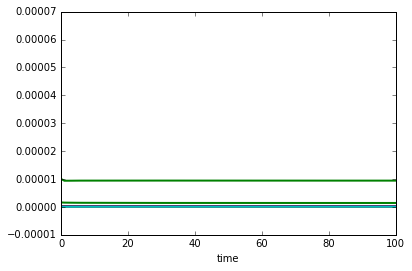

In [2]:
# run simulation
r.resetToOrigin()
r.simulate(0,100, steps=100);
r.plot(loc=None);
# print(antimonyStr)

/home/mkoenig/git/sbmlutils/sbmlutils/examples/models/calcium/_te_BIOMD0000000183/experiment1.xml


/home/mkoenig/git/tellurium/tellurium/tecombine.py:269: UserWarning: Combine archive directory already exists:/home/mkoenig/git/sbmlutils/sbmlutils/examples/models/calcium/_te_BIOMD0000000183
  warnings.warn("Combine archive directory already exists:{}".format(directory))


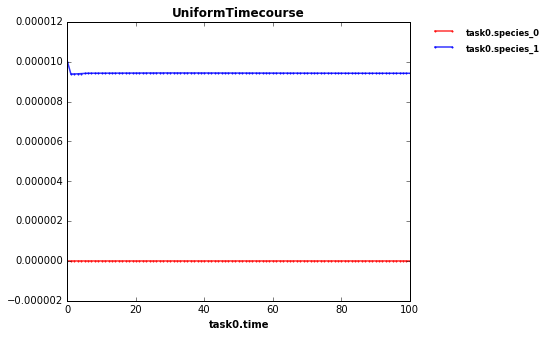

--------------------------------------------------------------------------------
report_1, Repeat: 0
--------------------------------------------------------------------------------
   task0.time  task0.species_1
0         0.0         0.000010
1         1.0         0.000009
2         2.0         0.000009
3         3.0         0.000009
4         4.0         0.000009


In [3]:
# Create SEDML
phrasedmlStr = """
    model0 = model "BIOMD0000000183"
    sim0 = simulate uniform(0, 100, 100)
    
    sim0.algorithm = CVODE
    sim0.algorithm.absolute_tolerance = 1e-21
    
    task0 = run sim0 on model0
    plot "UniformTimecourse" task0.time vs task0.species_0, task0.species_1
    report task0.time vs task0.species_1
"""

# phrasedml experiment
exp = te.experiment(antimonyStr, phrasedmlStr)

# execute python (sedml)
workingDir = '.'
exp.execute(phrasedmlStr, workingDir=workingDir)

In [5]:
r.resetToOrigin()
r['[species_1]']

1e-05

In [6]:
print(r['compartment_0'])
print(r['species_1'])
print(r['[species_1]'])

1e-15
1e-20
1e-05


/home/mkoenig/git/sbmlutils/sbmlutils/examples/models/calcium/_te_BIOMD0000000183/experiment1.xml


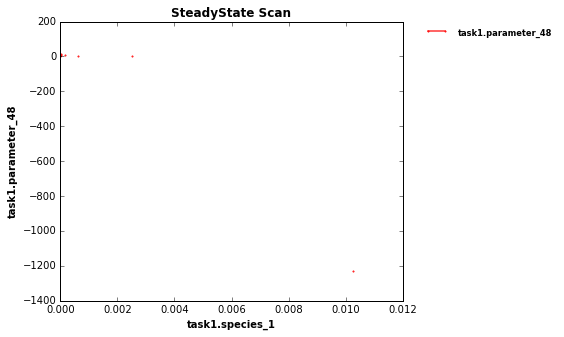

--------------------------------------------------------------------------------
report_1, Repeat: 0
--------------------------------------------------------------------------------
   task1.species_1  task1.parameter_48
0     3.822559e-08           -0.141121
--------------------------------------------------------------------------------
report_1, Repeat: 1
--------------------------------------------------------------------------------
   task1.species_1  task1.parameter_48
0     3.639558e-08            0.017075
--------------------------------------------------------------------------------
report_1, Repeat: 2
--------------------------------------------------------------------------------
   task1.species_1  task1.parameter_48
0     7.287761e-08            0.428038
--------------------------------------------------------------------------------
report_1, Repeat: 3
--------------------------------------------------------------------------------
   task1.species_1  task1.parameter_48

In [16]:
# steady state simulations are performed from 1E-8 - 1E-2 in logspace
# parameter_48: moles_bound_ca_per_moles_cam
phrasedmlStr = """
    model0 = model "BIOMD0000000183"
    
    sim0 = simulate steadystate
    // sim0 = simulate uniform(0, 100, 100)
    // sim0.algorithm = CVODE
    // sim0.algorithm.absolute_tolerance = 1e-21
    
    task0 = run sim0 on model0
    
    task1 = repeat task0 for species_1 in logUniform(-8, -2, 10), reset=true
    
    plot "SteadyState Scan" task1.species_1 vs task1.parameter_48
    report task1.species_1 vs task1.parameter_48
    
    // plot "UniformTimecourse" task1.time vs task1.species_1
    // report task1.time vs task1.species_1
"""

# phrasedml experiment
exp = te.experiment(antimonyStr, phrasedmlStr)

# execute python
workingDir = '.'
exp.execute(phrasedmlStr, workingDir=workingDir)

In [8]:
# write the python code for debugging
with open('code.py', 'w') as f:
    f.write(exp._toPython(phrasedmlStr, workingDir=workingDir))

/home/mkoenig/git/sbmlutils/sbmlutils/examples/models/calcium/_te_BIOMD0000000183/experiment1.xml


In [ ]:
# [2] store as combine archive and run
import os
from tellurium.tecombine import CombineArchive
combine = CombineArchive()
combine.addSEDMLStr(sedmlStr, 'specificationL1V2.sedml')
from tellurium.tests.testdata import sedxDir
combinePath = os.path.join(sedxDir, 'specificationL1V2.sedx')
combine.write(combinePath)

# Run Combine archive
te.executeSEDML(combinePath)
